# Generate report

### Import Libraries

In [1]:
import os
import pandas as pd
import folium
import calendar
from folium.plugins import HeatMap
from branca.element import Template, MacroElement
import matplotlib.pyplot as plt
from folium import FeatureGroup

### Get the paths to the folders in the dataset

In [2]:
notebook_folder = os.getcwd()
root_project = os.path.abspath(os.path.join(notebook_folder, '.'))
trufi_datos = os.path.abspath(os.path.join(root_project, 'Datos', 'Registros de Trufi App'))
municipios_datos = os.path.abspath(os.path.join(root_project, 'Datos', 'Poligonos','peru_provincial_simple.geojson'))
csv_file_path = os.path.join(trufi_datos, 'origin-destination.csv')
weeks_data = os.path.abspath(os.path.join(root_project, 'Weeks'))
outdata = os.path.abspath(os.path.join(root_project, 'Results'))

### Define year and month

In [3]:
# Define the year and month dynamically
analysis_year = 2024
analysis_month = 9

### Get files

In [4]:
# Convert the month number to the month name
month_name = calendar.month_name[analysis_month]
# List all CSV files in the path
csv_files = [file for file in os.listdir(weeks_data) if file.endswith('.csv')]
print("CSV files found:", csv_files)

# Read all CSV files and filter those that have the same format
dataframes = []
required_columns = {'date', 'origin_latitude', 'origin_longitude', 'destination_latitude', 'destination_longitude', 'userID'}
for file in csv_files:
    file_path = os.path.join(weeks_data, file)
    df = pd.read_csv(file_path, encoding='latin1')
    print(file_path, df.size/15)
    dataframes.append(df)
    
combined_df = pd.concat(dataframes)
print(combined_df.shape)

CSV files found: ['2024-09-02_to_2024-09-08_2024-36.csv', '2024-09-09_to_2024-09-15_2024-37.csv', '2024-09-16_to_2024-09-22_2024-38.csv', '2024-09-23_to_2024-09-29_2024-39.csv', '2024-09-30_to_2024-10-06_2024-40.csv']
D:\TrufiData\Weeks\2024-09-02_to_2024-09-08_2024-36.csv 720.0
D:\TrufiData\Weeks\2024-09-09_to_2024-09-15_2024-37.csv 19264.0
D:\TrufiData\Weeks\2024-09-16_to_2024-09-22_2024-38.csv 11174.0
D:\TrufiData\Weeks\2024-09-23_to_2024-09-29_2024-39.csv 9930.0
D:\TrufiData\Weeks\2024-09-30_to_2024-10-06_2024-40.csv 964.0
(42052, 15)


In [5]:
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Convert the month number to the month name
month_name = calendar.month_name[analysis_month]

# Filter data based on the specified year and month
filtered_df = combined_df[(combined_df['date'].dt.year == analysis_year) & (combined_df['date'].dt.month == analysis_month)]
print(filtered_df.size)

# Calculate the total number of unique users for the selected month
total_users = filtered_df['userID'].nunique()

630780


## Evaluate number of users

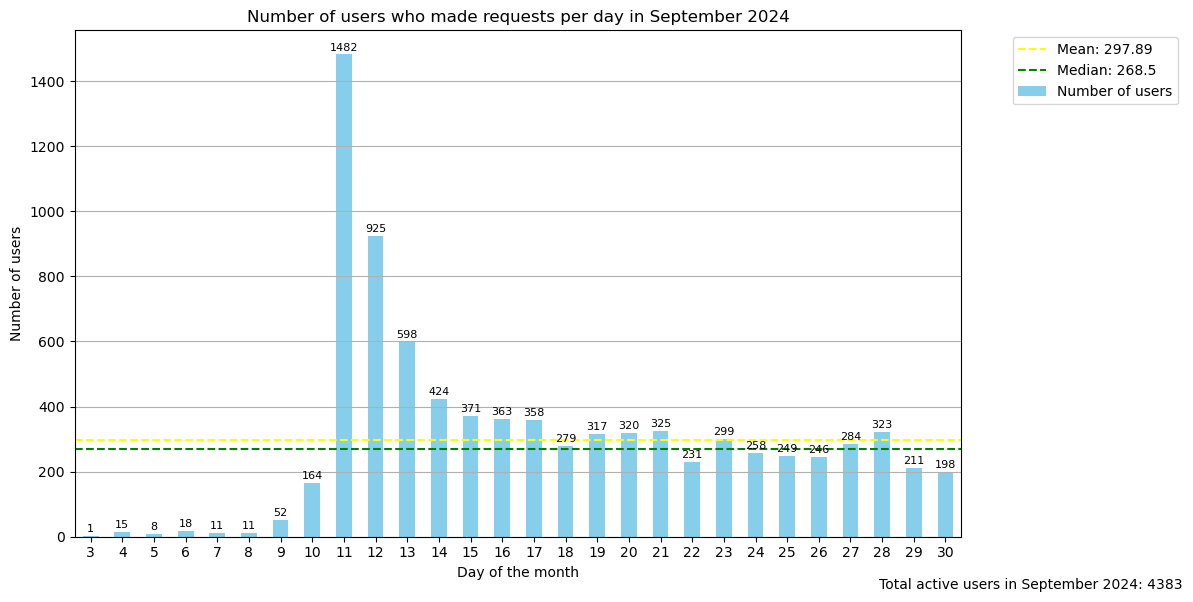

Number of users who made requests per day of the week in September 2024: day_of_week
Monday        808
Tuesday       730
Wednesday    1875
Thursday     1361
Friday       1100
Saturday      968
Sunday        750
Name: userID, dtype: int64


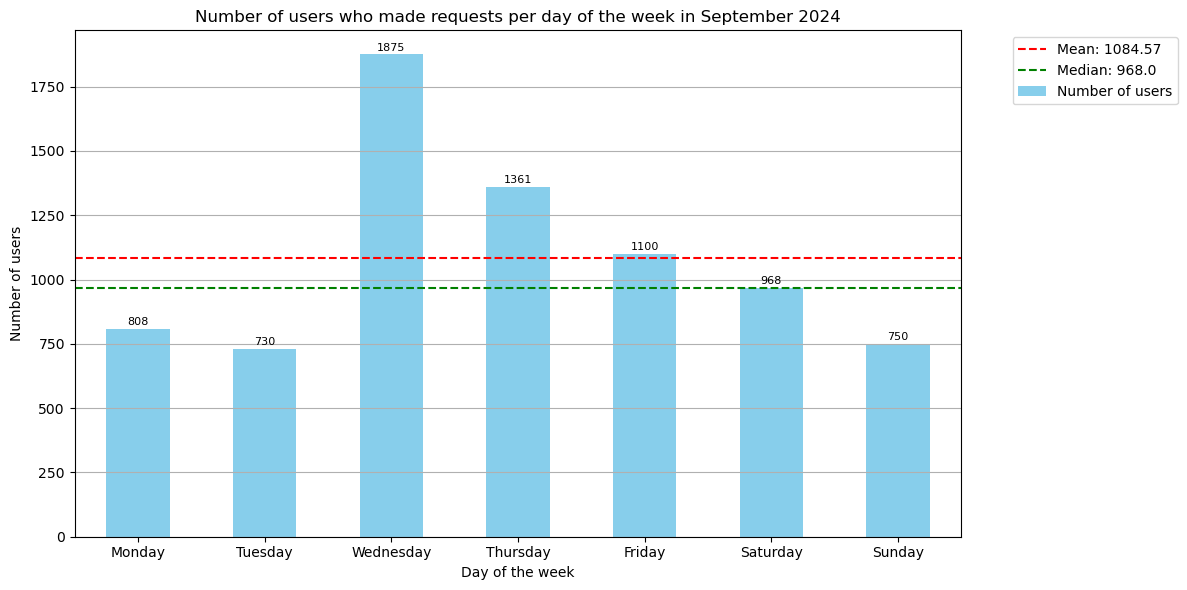

Number of users who made requests per hour in September 2024: hour
0     126
1      76
2      49
3      27
4      31
5     110
6     354
7     472
8     520
9     602
10    606
11    637
12    638
13    647
14    674
15    568
16    547
17    483
18    480
19    499
20    448
21    403
22    310
23    229
Name: userID, dtype: int64


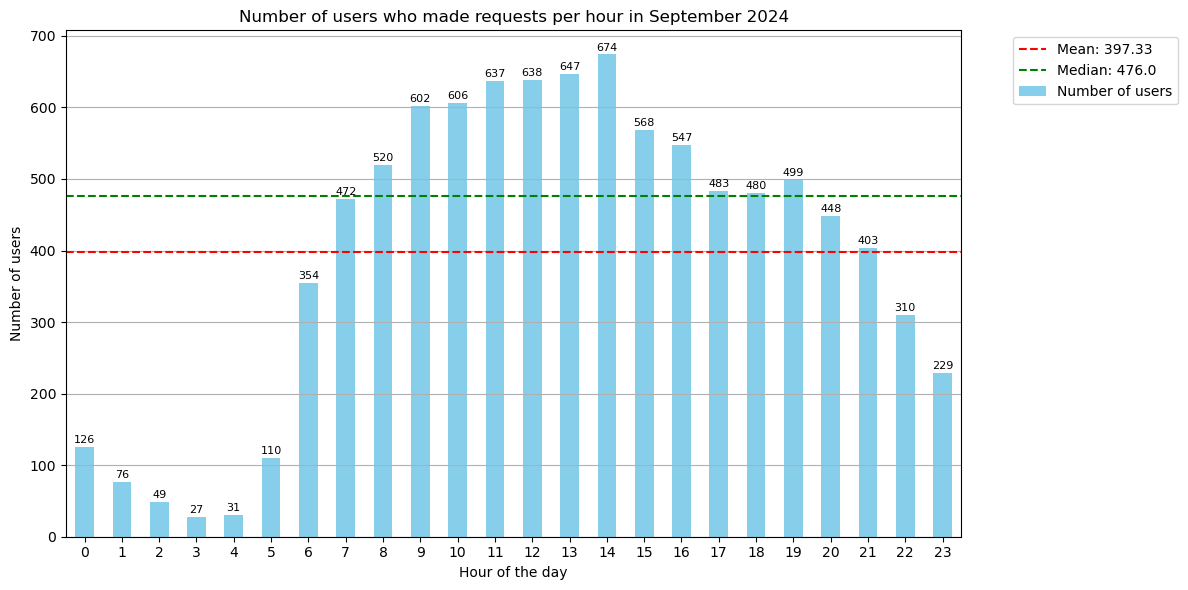

In [6]:
# Analysis per day of the month
users_per_day = filtered_df.groupby(filtered_df['date'].dt.day)['userID'].nunique()

# Calculate mean, median, and mode
mean_value = users_per_day.mean()
median_value = users_per_day.median()

# Visualize the number of users who made requests per day in a bar chart
plt.figure(figsize=(12, 6))
bar_plot = users_per_day.plot(kind='bar', color='skyblue', label='Number of users')
plt.axhline(y=mean_value, color='yellow', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='green', linestyle='--', label=f'Median: {median_value}')

plt.title(f'Number of users who made requests per day in {month_name} {analysis_year}')
plt.xlabel('Day of the month')
plt.ylabel('Number of users')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figtext(0.99, 0.01, f'Total active users in {month_name} {analysis_year}: {total_users}', horizontalalignment='right')

# Add labels with values inside each bar
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Analysis per day of the week
filtered_df['day_of_week'] = filtered_df['date'].dt.day_name()
users_per_weekday = filtered_df.groupby('day_of_week')['userID'].nunique().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(f"Number of users who made requests per day of the week in {month_name} {analysis_year}:", users_per_weekday)

mean_weekly_value = users_per_weekday.mean()
median_weekly_value = users_per_weekday.median()

plt.figure(figsize=(12, 6))
bar_plot_weekly = users_per_weekday.plot(kind='bar', color='skyblue', label='Number of users')
plt.axhline(y=mean_weekly_value, color='red', linestyle='--', label=f'Mean: {mean_weekly_value:.2f}')
plt.axhline(y=median_weekly_value, color='green', linestyle='--', label=f'Median: {median_weekly_value}')
plt.title(f'Number of users who made requests per day of the week in {month_name} {analysis_year}')
plt.xlabel('Day of the week')
plt.ylabel('Number of users')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for p in bar_plot_weekly.patches:
    bar_plot_weekly.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Analysis per hour of the day
filtered_df['hour'] = filtered_df['date'].dt.hour
users_per_hour = filtered_df.groupby('hour')['userID'].nunique()
print(f"Number of users who made requests per hour in {month_name} {analysis_year}:", users_per_hour)

mean_hourly_value = users_per_hour.mean()
median_hourly_value = users_per_hour.median()

plt.figure(figsize=(12, 6))
bar_plot_hourly = users_per_hour.plot(kind='bar', color='skyblue', label='Number of users')
plt.axhline(y=mean_hourly_value, color='red', linestyle='--', label=f'Mean: {mean_hourly_value:.2f}')
plt.axhline(y=median_hourly_value, color='green', linestyle='--', label=f'Median: {median_hourly_value}')
plt.title(f'Number of users who made requests per hour in {month_name} {analysis_year}')
plt.xlabel('Hour of the day')
plt.ylabel('Number of users')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for p in bar_plot_hourly.patches:
    bar_plot_hourly.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

## Evaluate number of requests

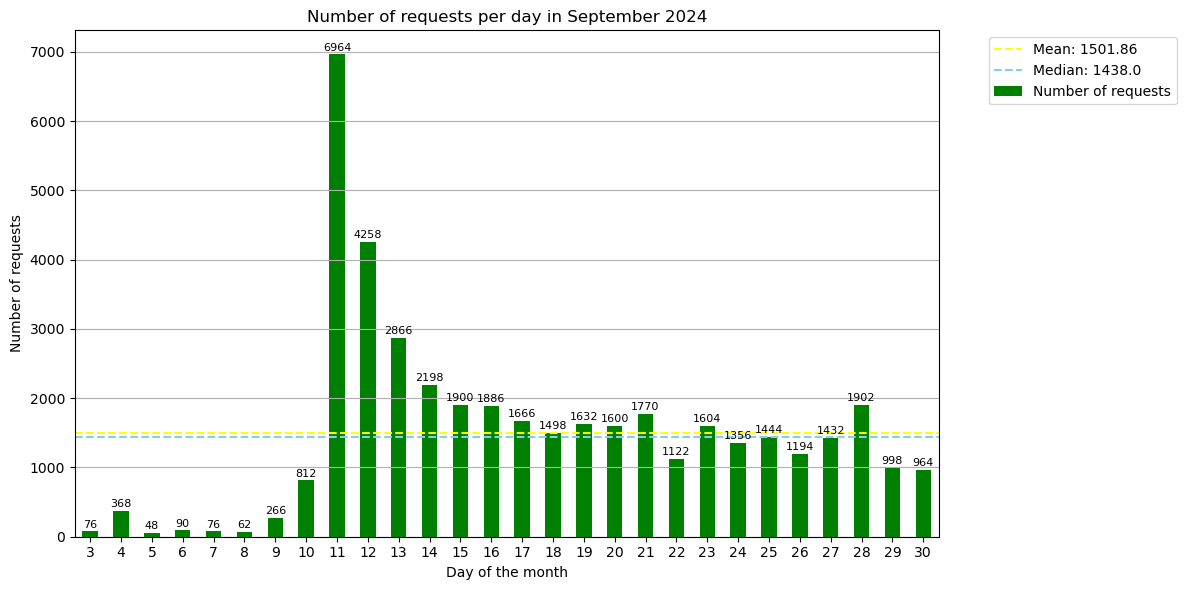

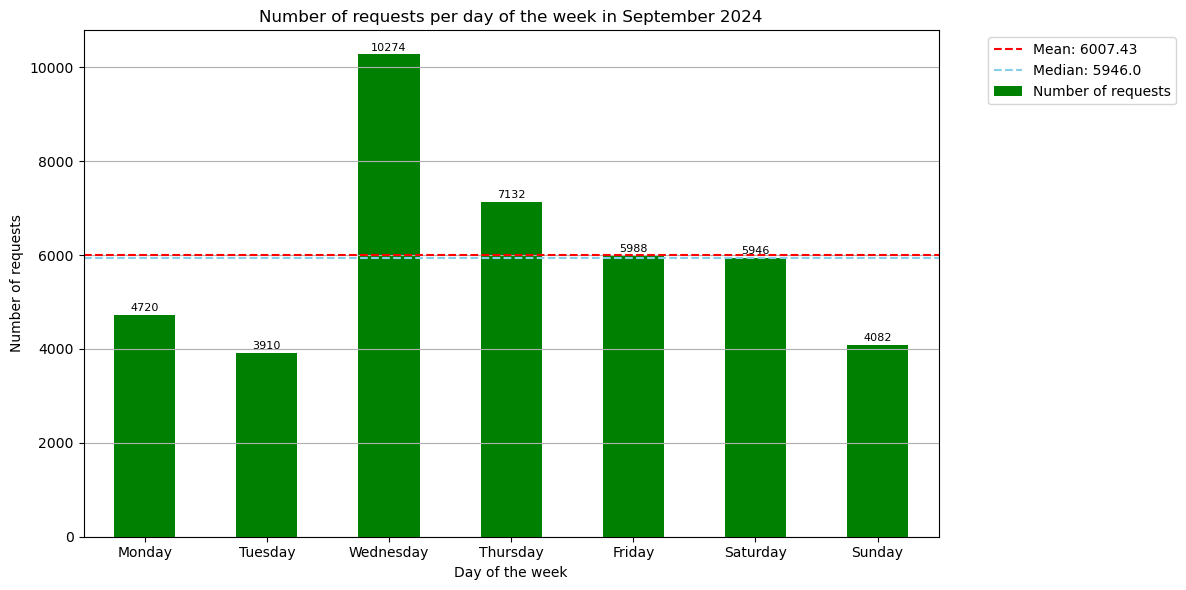

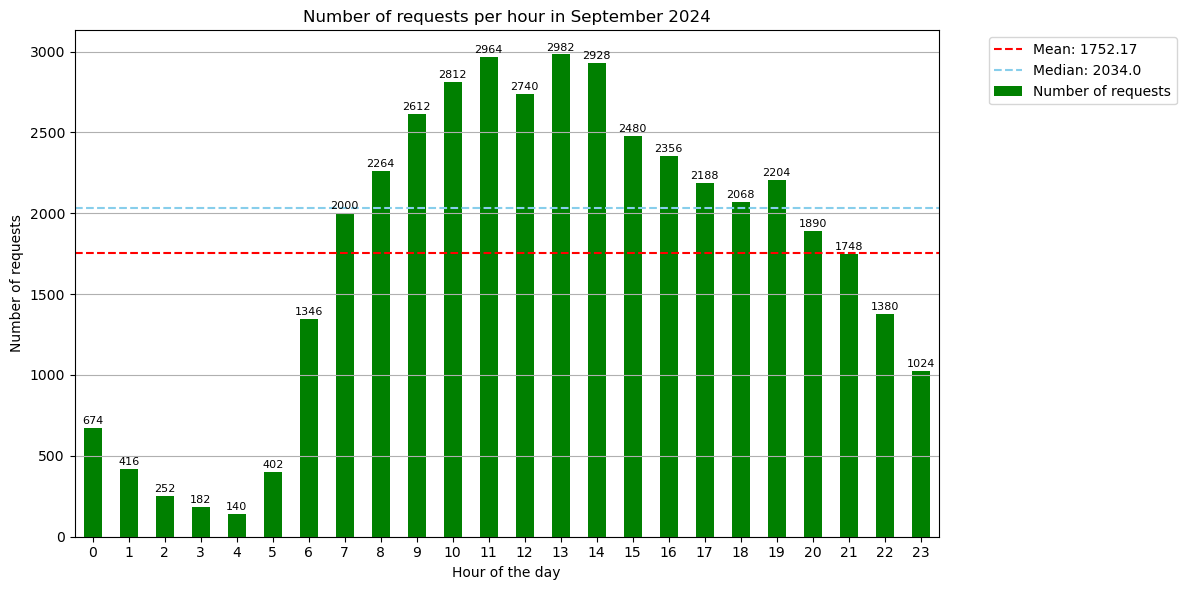

In [7]:
# Analysis per day of the month (total requests)
requests_per_day = filtered_df.groupby(filtered_df['date'].dt.day)['userID'].count()

# Calculate mean and median
mean_value = requests_per_day.mean()
median_value = requests_per_day.median()

# Visualize the number of requests per day in a bar chart
plt.figure(figsize=(12, 6))
bar_plot = requests_per_day.plot(kind='bar', color='green', label='Number of requests')
plt.axhline(y=mean_value, color='yellow', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='skyblue', linestyle='--', label=f'Median: {median_value}')
plt.title(f'Number of requests per day in {month_name} {analysis_year}')
plt.xlabel('Day of the month')
plt.ylabel('Number of requests')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels with values inside each bar
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Analysis per day of the week (total requests)
filtered_df['day_of_week'] = filtered_df['date'].dt.day_name()
requests_per_weekday = filtered_df.groupby('day_of_week')['userID'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_weekly_value = requests_per_weekday.mean()
median_weekly_value = requests_per_weekday.median()

plt.figure(figsize=(12, 6))
bar_plot_weekly = requests_per_weekday.plot(kind='bar', color='green', label='Number of requests')
plt.axhline(y=mean_weekly_value, color='red', linestyle='--', label=f'Mean: {mean_weekly_value:.2f}')
plt.axhline(y=median_weekly_value, color='skyblue', linestyle='--', label=f'Median: {median_weekly_value}')
plt.title(f'Number of requests per day of the week in {month_name} {analysis_year}')
plt.xlabel('Day of the week')
plt.ylabel('Number of requests')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for p in bar_plot_weekly.patches:
    bar_plot_weekly.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Analysis per hour of the day (total requests)
filtered_df['hour'] = filtered_df['date'].dt.hour
requests_per_hour = filtered_df.groupby('hour')['userID'].count()

mean_hourly_value = requests_per_hour.mean()
median_hourly_value = requests_per_hour.median()

plt.figure(figsize=(12, 6))
bar_plot_hourly = requests_per_hour.plot(kind='bar', color='green', label='Number of requests')
plt.axhline(y=mean_hourly_value, color='red', linestyle='--', label=f'Mean: {mean_hourly_value:.2f}')
plt.axhline(y=median_hourly_value, color='skyblue', linestyle='--', label=f'Median: {median_hourly_value}')
plt.title(f'Number of requests per hour in {month_name} {analysis_year}')
plt.xlabel('Hour of the day')
plt.ylabel('Number of requests')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for p in bar_plot_hourly.patches:
    bar_plot_hourly.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

### Get total of requests by month

In [8]:
total_requests = filtered_df['userID'].count()
print(f"Total requests of {month_name} / {analysis_year}: {total_requests}")

Total requests of September / 2024: 42052


In [9]:
filtered_df.size

630780

## Generate heatmap origin-destination points

In [10]:
# Usar el DataFrame filtrado dinámicamente
data = filtered_df

map_center = [filtered_df['origin_latitude'].mean(), filtered_df['origin_longitude'].mean()]
mapa = folium.Map(location=map_center, zoom_start=12)

heat_data_origen = [[row['origin_latitude'], row['origin_longitude']] for index, row in data.iterrows()]

heat_data_destino = [[row['destination_latitude'], row['destination_longitude']] for index, row in data.iterrows()]

heatmap_origen = HeatMap(heat_data_origen, name='Origen', blur=2, radius=5, gradient={0.2: 'purple', 0.4: 'violet', 0.6: 'pink', 0.8: 'magenta', 1.0: 'red'})
heatmap_destino = HeatMap(heat_data_destino, name='Destino', blur=2, radius=5, gradient={0.2: 'purple', 0.4: 'violet', 0.6: 'pink', 0.8: 'magenta', 1.0: 'red'})

heatmap_origen.add_to(mapa)
heatmap_destino.add_to(mapa)

folium.LayerControl().add_to(mapa)

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Mapas de Calor</title>
    <style>
        #map {
            position: absolute;
            top: 50px;
            bottom: 0;
            width: 100%;
        }
        .radio {
            position: absolute;
            top: 10px;
            left: 10px;
            background: white;
            padding: 10px;
            z-index: 9999;
        }
    </style>
</head>
<body>
<div id="map"></div>

<script>
    document.getElementById('origen').onclick = function () {
        {{ this.get_name() }}.eachLayer(function (layer) {
            if (layer.options.name === 'Origen') {
                layer.addTo({{ this.get_name() }});
            } else {
                {{ this.get_name() }}.removeLayer(layer);
            }
        });
    };
    document.getElementById('destino').onclick = function () {
        {{ this.get_name() }}.eachLayer(function (layer) {
            if (layer.options.name === 'Destino') {
                layer.addTo({{ this.get_name() }});
            } else {
                {{ this.get_name() }}.removeLayer(layer);
            }
        });
    };
</script>

</body>
</html>

{% endmacro %}
"""

macro = MacroElement()
# macro._template = Template(template)
mapa.get_root().add_child(macro)
# Ensure the directory exists
os.makedirs(outdata, exist_ok=True)

# Define the file name and path
html_file_name = f'origin-destination_heatmap_{month_name}_{analysis_year}.html'
html_file_path = os.path.join(outdata, html_file_name)

# Save the map to the specified directory
mapa.save(html_file_path)

## Generate csv with origin-destination table

In [11]:
viajes = filtered_df[['origin_municipio', 'dest_municipio']]

viajes_counts = viajes.groupby(['origin_municipio', 'dest_municipio']).size().reset_index(name='viajes')

tabla_viajes = viajes_counts.pivot_table(index='dest_municipio', columns='origin_municipio', values='viajes', fill_value=0)

print(f"Tabla de conteo de solicitudes de viaje para {month_name} de {analysis_year}:")
print(tabla_viajes)

os.makedirs(outdata, exist_ok=True)

csv_file_name = f'trip_table_{month_name}_{analysis_year}.csv'
csv_file_path = os.path.join(outdata, csv_file_name)

tabla_viajes.to_csv(csv_file_path, index=True)

Tabla de conteo de solicitudes de viaje para September de 2024:
origin_municipio  AREQUIPA  CALLAO  ISLAY  LIMA  MARISCAL NIETO  TACNA  \
dest_municipio                                                           
AREQUIPA             41964       6      4     2               2      4   
CANCHIS                  2       0      0     0               0      0   
ISLAY                    8       0      0     0               0      0   
LIMA                     2       0      0     0               0      0   
TACNA                    2       0      0     0               0      0   
TAMBOPATA                2       0      0     0               0      0   
external                18       0      0     0               0      0   

origin_municipio  external  
dest_municipio              
AREQUIPA                36  
CANCHIS                  0  
ISLAY                    0  
LIMA                     0  
TACNA                    0  
TAMBOPATA                0  
external                 0  


## Generate provincies sorted

In [12]:
origen_counts = filtered_df['origin_municipio'].value_counts()
destino_counts = filtered_df['dest_municipio'].value_counts()

origenes = list(origen_counts.index)
destinos = list(destino_counts.index)

print(f"Lista de municipios como origen con conteo para {month_name} de {analysis_year}:")
for origen in origenes:
    print(f"{origen}: {origen_counts[origen]}")

print(f"\nLista de municipios como destino con conteo para {month_name} de {analysis_year}:")
for destino in destinos:
    print(f"{destino}: {destino_counts[destino]}")


Lista de municipios como origen con conteo para September de 2024:
AREQUIPA: 41998
external: 36
CALLAO: 6
ISLAY: 4
TACNA: 4
LIMA: 2
MARISCAL NIETO: 2

Lista de municipios como destino con conteo para September de 2024:
AREQUIPA: 42018
external: 18
ISLAY: 8
LIMA: 2
TACNA: 2
CANCHIS: 2
TAMBOPATA: 2


## Generate top 25 users with more requests

In [13]:
if dataframes:
    combined_df = pd.concat(dataframes)

    combined_df['date'] = pd.to_datetime(combined_df['date'])

    filtered_df = combined_df[(combined_df['date'].dt.year == analysis_year) & (combined_df['date'].dt.month == analysis_month)]

    requests_per_user = filtered_df['userID'].value_counts()

    top_users = requests_per_user.head(25)
    print(f"Top 20 users with the most requests in {month_name} {analysis_year}:")
    print(top_users)
else:
    print("No DataFrames found to concatenate.")


Top 20 users with the most requests in September 2024:
58d343f1-70f5-418c-930f-b3ff4b5db4da    200
6be5ace5-49c6-4a4e-9d12-7b73bc3c6504    188
50f654b5-9402-4963-b1bd-c402e886b64a    146
0d0f4d99-28e2-4103-a33e-d4334c2ddc30    126
8a5599af-06c4-4f80-a4de-e44fc03fb571    122
2a6bbb9f-3133-4a2c-8943-86f26fe9bd1b    116
7681a352-7e55-4177-93a6-827b5ce6bf71    112
eee8371c-776f-40d2-9756-f8b668288d5e    112
4b333e7d-adce-4ee8-98bb-931a418af880    106
d0685443-a609-4e55-888b-6c964a6e7cb3    106
e58c2b8f-ae35-4089-b556-99f97fede13f    106
50b79d6e-a5a4-4c60-9053-004460a33207    104
423c40a7-482f-43d9-aacc-edfa60933979    102
05b6ea53-c53b-48f1-85b2-47b1c5def303    102
973fe254-7399-4d8c-b145-b2ebdea6b164     96
f9bd75d7-9dcd-4b30-ac51-2ebb1f986ddb     92
431dac05-9b58-457f-a87d-eba138ef60ad     90
b9528a60-e5ed-4659-bcb4-196f56d875c2     88
4a34c7a4-4727-423f-8919-b3b59b29e8d9     86
8df28790-f905-41a5-b776-39751eb6607d     84
c9e8868c-2f4e-4daf-b5fc-87d80c5c4af1     84
8319f722-4d5d-4ec3-b9

## Generate top 25 places origin-destination

In [15]:
if dataframes:
    combined_df = pd.concat(dataframes)

    combined_df['date'] = pd.to_datetime(combined_df['date'])

    filtered_df = combined_df[(combined_df['date'].dt.year == analysis_year) & (combined_df['date'].dt.month == analysis_month)]

    coordinates_counts_origin = filtered_df.groupby(['origin_latitude', 'origin_longitude']).size().reset_index(name='counts_origin')
    coordinates_counts_destination = filtered_df.groupby(['destination_latitude', 'destination_longitude']).size().reset_index(name='counts_destination')

    top_coordinates_o = coordinates_counts_origin.sort_values(by='counts_origin', ascending=False).head(25)
    top_coordinates_d = coordinates_counts_destination.sort_values(by='counts_destination', ascending=False).head(25)
    
    top_coordinates_o = top_coordinates_o.reset_index(drop=True)
    top_coordinates_o['top'] = top_coordinates_o.index + 1

    top_coordinates_d = top_coordinates_d.reset_index(drop=True)
    top_coordinates_d['top'] = top_coordinates_d.index + 1

    top_coordinates_o = top_coordinates_o[['top', 'origin_latitude', 'origin_longitude', 'counts_origin']]
    top_coordinates_d = top_coordinates_d[['top', 'destination_latitude', 'destination_longitude', 'counts_destination']]

    merged_df = pd.merge(top_coordinates_o, top_coordinates_d, on='top')

    os.makedirs(outdata, exist_ok=True)

    csv_file_name = 'top25-origin-destination.csv'
    csv_file_path = os.path.join(outdata, csv_file_name)

    merged_df.to_csv(csv_file_path, index=False)
    print(merged_df)
    print(f"Top 25 coordinates with the most occurrences O in {month_name} {analysis_year}:")
    print(top_coordinates_o)
    print(f"Top 25 coordinates with the most occurrences D in {month_name} {analysis_year}:")
    print(top_coordinates_d)
else:
    print("No DataFrames found to concatenate.")


    top  origin_latitude  origin_longitude  counts_origin  \
0     1       -16.405816        -71.548751            264   
1     2       -16.392941        -71.538491            252   
2     3       -16.423185        -71.544105            240   
3     4       -16.402360        -71.525054            230   
4     5       -16.407343        -71.539034            210   
5     6       -16.409000        -71.537500            174   
6     7       -16.391706        -71.563781            126   
7     8       -16.398833        -71.536970            122   
8     9       -16.397108        -71.524351            112   
9    10       -16.325685        -71.609886            106   
10   11       -16.390102        -71.535889            100   
11   12       -16.403459        -71.547646             88   
12   13       -16.388088        -71.551865             88   
13   14       -16.388932        -71.549276             76   
14   15       -16.405387        -71.521278             74   
15   16       -16.446194

## Generate map with top 25 places origin-destination

In [16]:
mapa = folium.Map(location=map_center, zoom_start=12)

def add_top_markers(top_coordinates, color, prefix, lat_column, lon_column, group, counts):
    for top, row in top_coordinates.iterrows():
        top_label = f"{prefix}"
        popup_content = f"<div style='white-space: nowrap;'>{top_label}: {row[counts]} ocurrencias</div>"
        folium.Marker(
            location=[row[lat_column], row[lon_column]],
            popup=folium.Popup(popup_content),
            icon=folium.Icon(color=color),
        ).add_to(group)
        folium.Marker(
            location=[row[lat_column], row[lon_column]],
            icon=folium.DivIcon(html=f"""<div style="font-size: 12pt; color: {color}; white-space: nowrap;">top {top + 1}</div>""")
        ).add_to(group)

origen_group = FeatureGroup(name='Origen')
destino_group = FeatureGroup(name='Destino')

add_top_markers(top_coordinates_o, 'blue', 'Origen', 'origin_latitude', 'origin_longitude', origen_group, 'counts_origin')

add_top_markers(top_coordinates_d, 'red', 'Destino', 'destination_latitude', 'destination_longitude', destino_group, 'counts_destination')

origen_group.add_to(mapa)
destino_group.add_to(mapa)

folium.LayerControl().add_to(mapa)

macro = MacroElement()
mapa.get_root().add_child(macro)

os.makedirs(outdata, exist_ok=True)

# Save the map to the specified directory
file_name = f'top25-origin-destination_{month_name}_{analysis_year}.html'
file_path = os.path.join(outdata, file_name)
mapa.save(file_path)